<a href="https://colab.research.google.com/github/Rinkal-27/LGMVIP--DataScience/blob/main/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

In [3]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095450 sha256=faba31c2dcd21a876e06835c89cbf0de5a1e54052afd1bdde42f390c8e4df670
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [28]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload your Kaggle API key (kaggle.json)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


In [29]:
!kaggle competitions download -c kkbox-music-recommendation-challenge


 99% 343M/345M [00:12<00:00, 37.1MB/s]
100% 345M/345M [00:13<00:00, 27.8MB/s]


In [30]:
!unzip kkbox-music-recommendation-challenge.zip -d kkbox_dataset


Archive:  kkbox-music-recommendation-challenge.zip
  inflating: kkbox_dataset/members.csv.7z  
  inflating: kkbox_dataset/sample_submission.csv.7z  
  inflating: kkbox_dataset/song_extra_info.csv.7z  
  inflating: kkbox_dataset/songs.csv.7z  
  inflating: kkbox_dataset/test.csv.7z  
  inflating: kkbox_dataset/train.csv.7z  


In [3]:
# !pip install pyunpack
# !pip install patool

from pyunpack import Archive
import pandas as pd

# Extract the dataset files from the .7z archives
Archive('kkbox_dataset/members.csv.7z').extractall('kkbox_dataset')
Archive('kkbox_dataset/sample_submission.csv.7z').extractall('kkbox_dataset')
Archive('kkbox_dataset/song_extra_info.csv.7z').extractall('kkbox_dataset')
Archive('kkbox_dataset/songs.csv.7z').extractall('kkbox_dataset')
Archive('kkbox_dataset/test.csv.7z').extractall('kkbox_dataset')
Archive('kkbox_dataset/train.csv.7z').extractall('kkbox_dataset')

# Load the extracted dataset files into pandas DataFrames
members_data = pd.read_csv('kkbox_dataset/members.csv')
sample_submission_data = pd.read_csv('kkbox_dataset/sample_submission.csv')
song_extra_info_data = pd.read_csv('kkbox_dataset/song_extra_info.csv')
songs_data = pd.read_csv('kkbox_dataset/songs.csv')
test_data = pd.read_csv('kkbox_dataset/test.csv')
train_data = pd.read_csv('kkbox_dataset/train.csv')

In [7]:
# Perform EDA on the train data
print("Train Data:")
print(train_data.head())
print(train_data.info())
print(train_data.describe())

# Perform EDA on the members data
print("\nMembers Data:")
print(members_data.head())
print(members_data.info())
print(members_data.describe())

# Perform EDA on the songs data
print("\nSongs Data:")
print(songs_data.head())
print(songs_data.info())
print(songs_data.describe())

Train Data:
                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              E

In [5]:
# Merge the datasets based on common columns
merged_data = pd.merge(train_data, members_data, on='msno', how='left')
merged_data = pd.merge(merged_data, songs_data, on='song_id', how='left')

In [6]:
# Perform further EDA on the merged data
print("\nMerged Data:")
print(merged_data.head())
print(merged_data.info())
print(merged_data.describe())


Merged Data:
                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  city  bd  gender  \
0              Explore  online-playlist       1     1   0     NaN   
1  Local playlist more   local-playlist       1    13  24  female   
2  Local playlist more   local-playlist       1    13  24

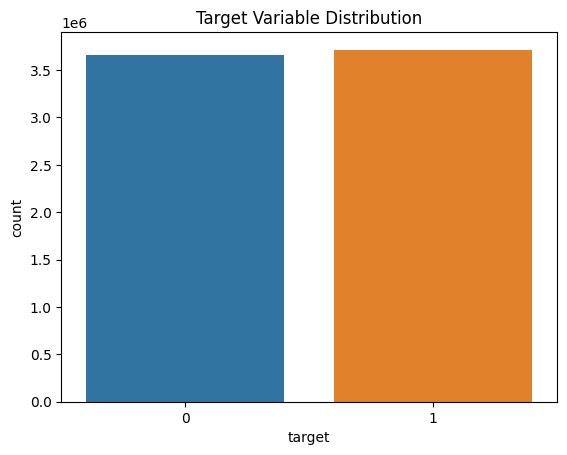

In [37]:
# Visualize the target variable distribution
sns.countplot(data=merged_data, x='target')
plt.title('Target Variable Distribution')
plt.show()

<ipython-input-8-415c70655f07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data.corr()


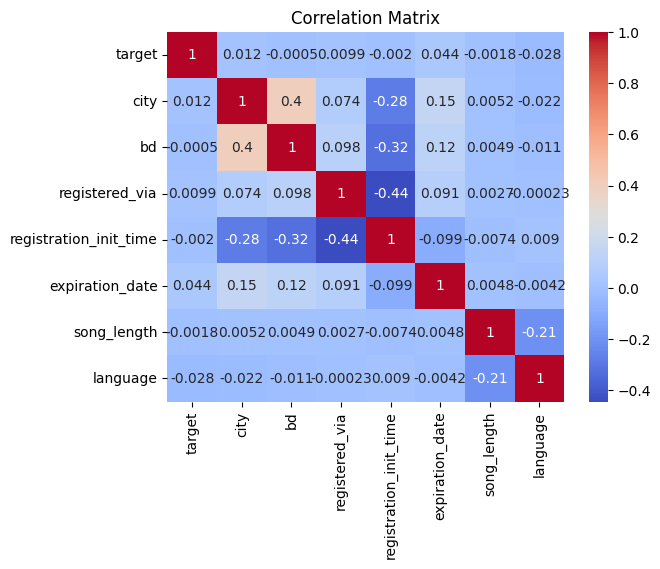

In [8]:
# Visualize the correlation matrix
corr_matrix = merged_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Create the Surprise Reader object
reader = Reader(rating_scale=(0, 1))

# Load the dataset into Surprise format
data = Dataset.load_from_df(train_data[['msno', 'song_id', 'target']], reader)

In [10]:
# Split the data into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
# Define the SVD model
model = SVD()

# Train the model on the training set
model.fit(train_set)

In [12]:
# Make predictions on the test set
predictions = model.test(test_set)

# Evaluate the model using RMSE
accuracy = rmse(predictions)
print("RMSE:", accuracy)

RMSE: 0.4555
RMSE: 0.45554985620094357
